In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 601.3 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


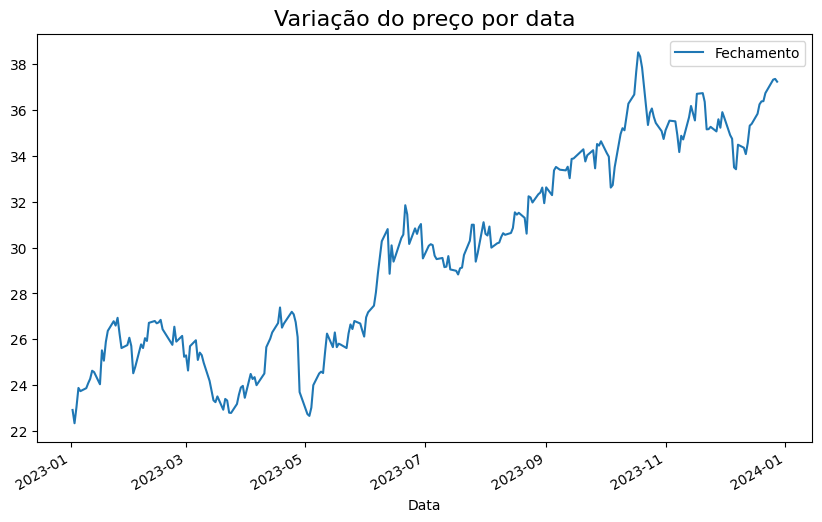

In [ ]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
df = dados.head(60).copy()
# Convertendo o índice em uma coluna de data
df['Data'] = df.index
# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


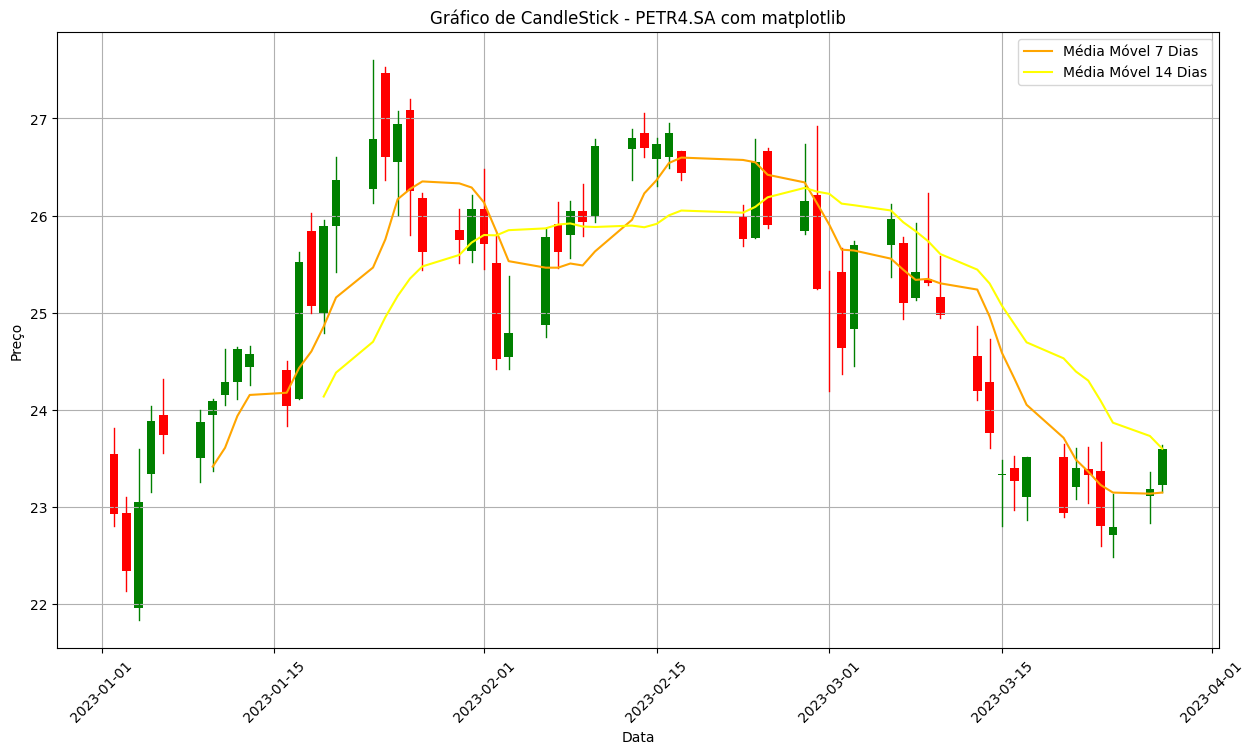

In [ ]:
# Gráfico de velas na mão
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7
for i in range(len(df)):
  if (df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]):
    color = 'green'
  else:
    color = 'red'
  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color=color,
          linewidth=1)
  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width,
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                             facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')
ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title('Gráfico de CandleStick - PETR4.SA com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

In [ ]:
#Gráfico com a API
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlestick', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=True,
                  width=1100, height=600)

fig.show()


In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


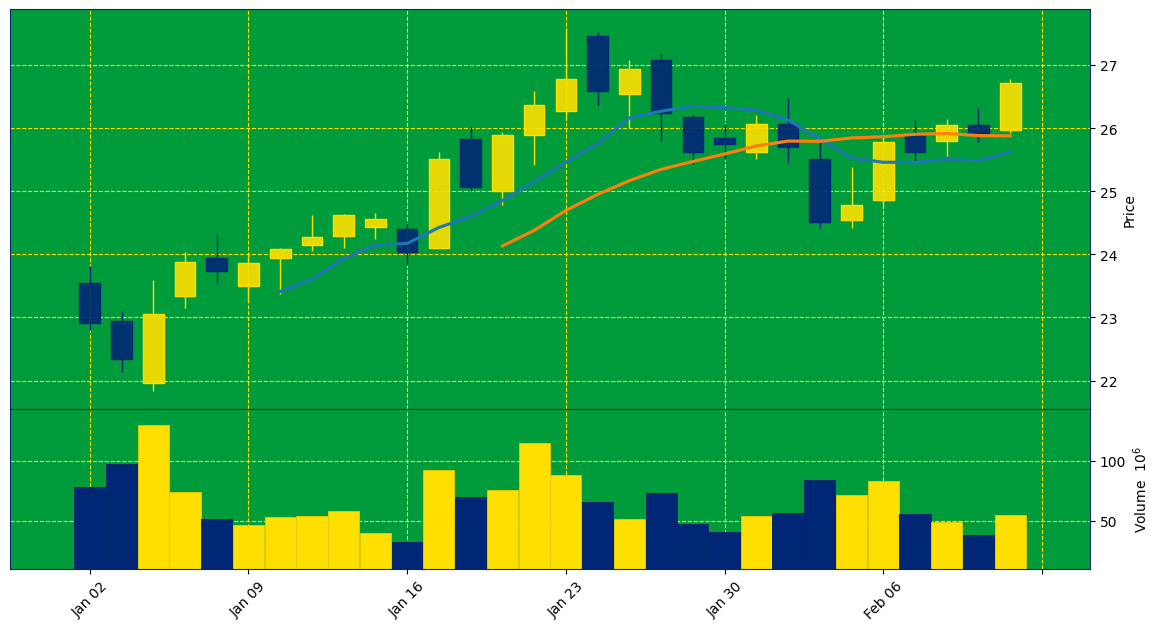

In [ ]:
mpf.plot(dados.head(30), type='candle', figsize=(15,8), volume=True, mav=(7,14), style='brasil')

In [ ]:
#Fazendo download das acoes da apple, do ano de 2010 á 2020
dados_apple = yf.download('AAPL', start='2010-01-01', end='2020-12-31')
dados_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523254,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514496,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146622,124486200


In [ ]:
#Renomeando as colunas
dados_apple.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523254,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514496,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146622,124486200


In [ ]:
#Renomeando a coluna Date
dados_apple = dados_apple.rename_axis('Data')
dados_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523254,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514496,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146622,124486200


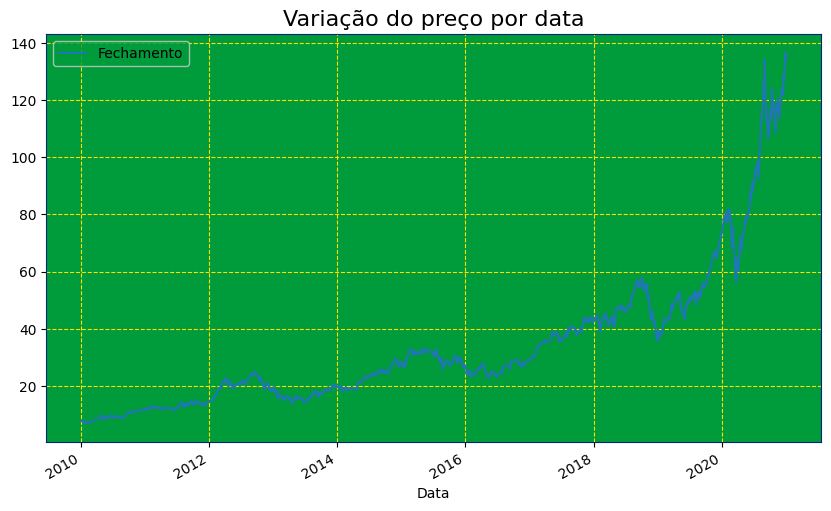

In [ ]:
dados_apple['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
df_apple = dados_apple.head(60).copy()
# Convertendo o índice em uma coluna de data
df_apple['Data'] = df_apple.index
# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df_apple['Data'] = df_apple['Data'].apply(mdates.date2num)
df_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,14613.0
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800,14614.0
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000,14615.0
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,14616.0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800,14617.0
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.352822,462229600,14620.0
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.280556,594459600,14621.0
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.369151,605892000,14622.0
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.332260,432894000,14623.0


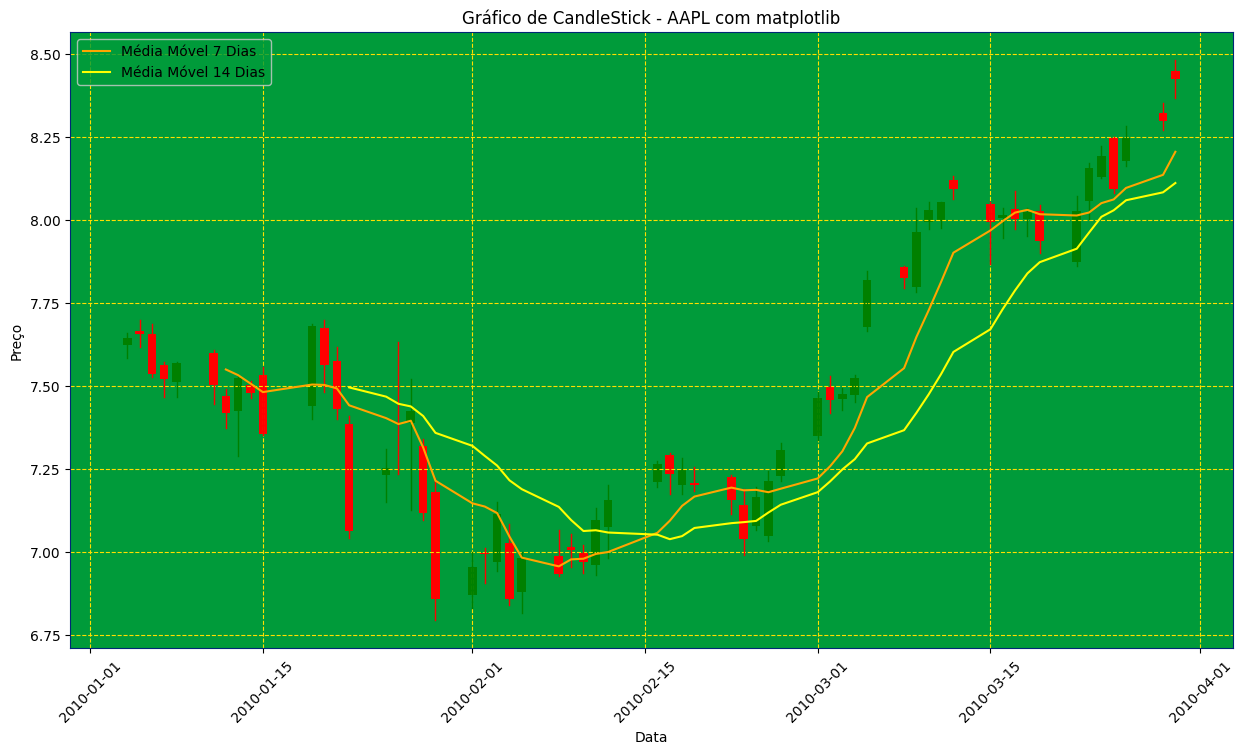

In [ ]:
# Gráfico de velas na mão
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7
for i in range(len(df_apple)):
  if (df_apple['Fechamento'].iloc[i] > df_apple['Abertura'].iloc[i]):
    color = 'green'
  else:
    color = 'red'
  ax.plot([df_apple['Data'].iloc[i], df_apple['Data'].iloc[i]],
          [df_apple['Minimo'].iloc[i], df_apple['Maximo'].iloc[i]],
          color=color,
          linewidth=1)
  ax.add_patch(plt.Rectangle((df_apple['Data'].iloc[i] - width/2, min(df_apple['Abertura'].iloc[i], df_apple['Fechamento'].iloc[i])),
                             width,
                             abs(df_apple['Fechamento'].iloc[i] - df_apple['Abertura'].iloc[i]),
                             facecolor=color))

df_apple['MA7'] = df_apple['Fechamento'].rolling(window=7).mean()
df_apple['MA14'] = df_apple['Fechamento'].rolling(window=14).mean()

ax.plot(df_apple['Data'], df_apple['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(df_apple['Data'], df_apple['MA14'], color='yellow', label='Média Móvel 14 Dias')
ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title('Gráfico de CandleStick - AAPL com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

In [ ]:
#Gráfico com a API 1
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.2,
                    subplot_titles=('Candlestick', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df_apple.index,
                             open=df_apple['Abertura'],
                             high=df_apple['Maximo'],
                             low=df_apple['Minimo'],
                             close=df_apple['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df_apple.index,
                         y=df_apple['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df_apple.index,
                         y=df_apple['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df_apple.index,
                     y=df_apple['Volume'],
                     name='Volume'),
                     row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=True,
                  width=1100, height=600)

fig.show()


In [ ]:
dados_apple_1 = yf.download('AAPL', start='2010-01-01', end='2020-12-31')
dados_apple_1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523254,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514496,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146622,124486200


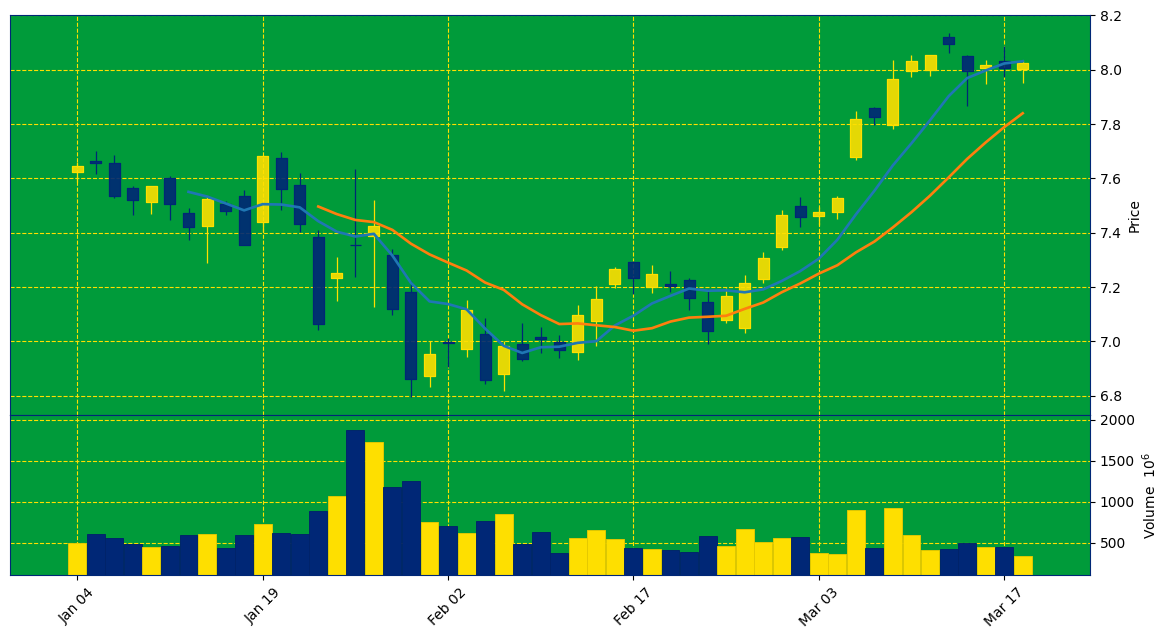

In [ ]:
mpf.plot(dados_apple_1.head(52), type='candle', figsize=(15,8), volume=True, mav=(7,14), style='brasil')